### Birds Dataset
### Binary classification (EuroBirds 🐦)

Source: [400 Birds Species Classification](https://medium.com/@toushalipal6991/400-birds-species-classification-f4de768aac4)

In [1]:
import os

current_dir = os.getcwd()
dataset_path = f'{current_dir}/100-bird-species'

In [2]:
from tqdm.notebook import tqdm
from matplotlib.pyplot import imread

def get_counts(dataset_path,dataset_type):
  """Takes dataset's folder path and returns some basic details like species count, images count, height, width etc."""
  all_species_count = len(os.listdir(dataset_path))
  # if .DS_Store/ is in list, remove it
  if '.DS_Store' in os.listdir(dataset_path):
    os.remove(f"{dataset_path}/.DS_Store")
  all_species_names=[]
  species_image_count=[]
  all_heights=[]
  all_widths=[]
  for i in tqdm(os.listdir(dataset_path)):
    all_species_names.append(i)
    species_folder_path = f"{dataset_path}/{i}/"
    print(f"Species: {i}")
    print(f"{species_folder_path}")
    species_image_count.append(len(os.listdir(species_folder_path)))
    for j in os.listdir(species_folder_path):
      filename = species_folder_path + j
      image = imread(filename)
      all_heights.append(image.shape[0])
      all_widths.append(image.shape[1])
  print()
  print(f"Total no. of species in {dataset_type} = {all_species_count}")
  return all_species_names, species_image_count, all_heights, all_widths

### Data Prep

In [3]:
# Get counts for validation dataset
(
    train_species_names,
    train_species_image_count,
    train_heights,train_widths 
) = get_counts(dataset_path=f"{dataset_path}/train",dataset_type="train")

(
    test_species_names,
    test_species_image_count,
    test_heights,train_widths 
) = get_counts(dataset_path=f"{dataset_path}/test",dataset_type="test")

(
    val_species_names,
    val_species_image_count,
    val_heights,train_widths 
) = get_counts(dataset_path=f"{dataset_path}/valid",dataset_type="valid")

check = sorted(train_species_names) == sorted(val_species_names) == sorted(test_species_names)
print("Are all species names same in train, validation & test datasets? -->",check)

  0%|          | 0/525 [00:00<?, ?it/s]

Species: CREAM COLORED WOODPECKER
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/CREAM COLORED WOODPECKER/
Species: CAMPO FLICKER
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/CAMPO FLICKER/
Species: RUFUOS MOTMOT
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/RUFUOS MOTMOT/
Species: WHITE TAILED TROPIC
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/WHITE TAILED TROPIC/
Species: KOOKABURRA
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/KOOKABURRA/
Species: TREE SWALLOW
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/TREE SWALLOW/
Species: ORNATE HAWK EAGLE
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/ORNATE HAWK EAGLE/
Species: AMERICAN REDSTART
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/train/AMERICAN REDSTART/
Species: EASTERN TOWEE
/Users/deburky/Documents/python/pytorchTutorial/100-bird-specie

  0%|          | 0/525 [00:00<?, ?it/s]

Species: CREAM COLORED WOODPECKER
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/CREAM COLORED WOODPECKER/
Species: CAMPO FLICKER
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/CAMPO FLICKER/
Species: RUFUOS MOTMOT
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/RUFUOS MOTMOT/
Species: WHITE TAILED TROPIC
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/WHITE TAILED TROPIC/
Species: KOOKABURRA
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/KOOKABURRA/
Species: TREE SWALLOW
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/TREE SWALLOW/
Species: ORNATE HAWK EAGLE
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/ORNATE HAWK EAGLE/
Species: AMERICAN REDSTART
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/AMERICAN REDSTART/
Species: EASTERN TOWEE
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/test/E

  0%|          | 0/525 [00:00<?, ?it/s]

Species: CREAM COLORED WOODPECKER
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/CREAM COLORED WOODPECKER/
Species: CAMPO FLICKER
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/CAMPO FLICKER/
Species: RUFUOS MOTMOT
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/RUFUOS MOTMOT/
Species: WHITE TAILED TROPIC
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/WHITE TAILED TROPIC/
Species: KOOKABURRA
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/KOOKABURRA/
Species: TREE SWALLOW
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/TREE SWALLOW/
Species: ORNATE HAWK EAGLE
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/ORNATE HAWK EAGLE/
Species: AMERICAN REDSTART
/Users/deburky/Documents/python/pytorchTutorial/100-bird-species/valid/AMERICAN REDSTART/
Species: EASTERN TOWEE
/Users/deburky/Documents/python/pytorchTutorial/100-bird-specie

In [4]:
# I need your help with understanding why
common_species = set(train_species_names) & set(val_species_names) & set(test_species_names)
print("Common species in all three datasets are:")
print(common_species)

# what is their share of total species in the dataset
print(f"Share of common species in total species = {len(common_species)/len(train_species_names)*100:.2f}%")

Common species in all three datasets are:
{'RED CROSSBILL', 'CHUKAR PARTRIDGE', 'BLACK FACED SPOONBILL', 'HIMALAYAN MONAL', 'BLUE COAU', 'RED LEGGED HONEYCREEPER', 'SORA', 'SCARLET TANAGER', 'GREY HEADED FISH EAGLE', 'PAINTED BUNTING', 'PUFFIN', 'WHITE TAILED TROPIC', 'STRIPPED SWALLOW', 'GRAY PARTRIDGE', 'CRAB PLOVER', 'BLACK SWAN', 'DOUBLE BRESTED CORMARANT', 'BLACK THROATED WARBLER', 'CHATTERING LORY', 'COMMON HOUSE MARTIN', 'CERULEAN WARBLER', 'JABIRU', 'DUSKY LORY', 'FRIGATE', 'BLACK THROATED HUET', 'GREEN JAY', 'RED BEARDED BEE EATER', 'ORANGE BREASTED TROGON', 'GLOSSY IBIS', 'CRESTED CARACARA', 'SMITHS LONGSPUR', 'FOREST WAGTAIL', 'MARABOU STORK', 'FIRE TAILLED MYZORNIS', 'GREAT ARGUS', 'ROSE BREASTED GROSBEAK', 'DOWNY WOODPECKER', 'WILSONS BIRD OF PARADISE', 'WHITE BROWED CRAKE', 'DUNLIN', 'CARMINE BEE-EATER', 'POMARINE JAEGER', 'CLARKS NUTCRACKER', 'AMERICAN PIPIT', 'SHORT BILLED DOWITCHER', 'YELLOW CACIQUE', 'FLAME TANAGER', 'BLACK TAIL CRAKE', 'STRIPED OWL', 'AFRICAN EMERALD

### Scan some images

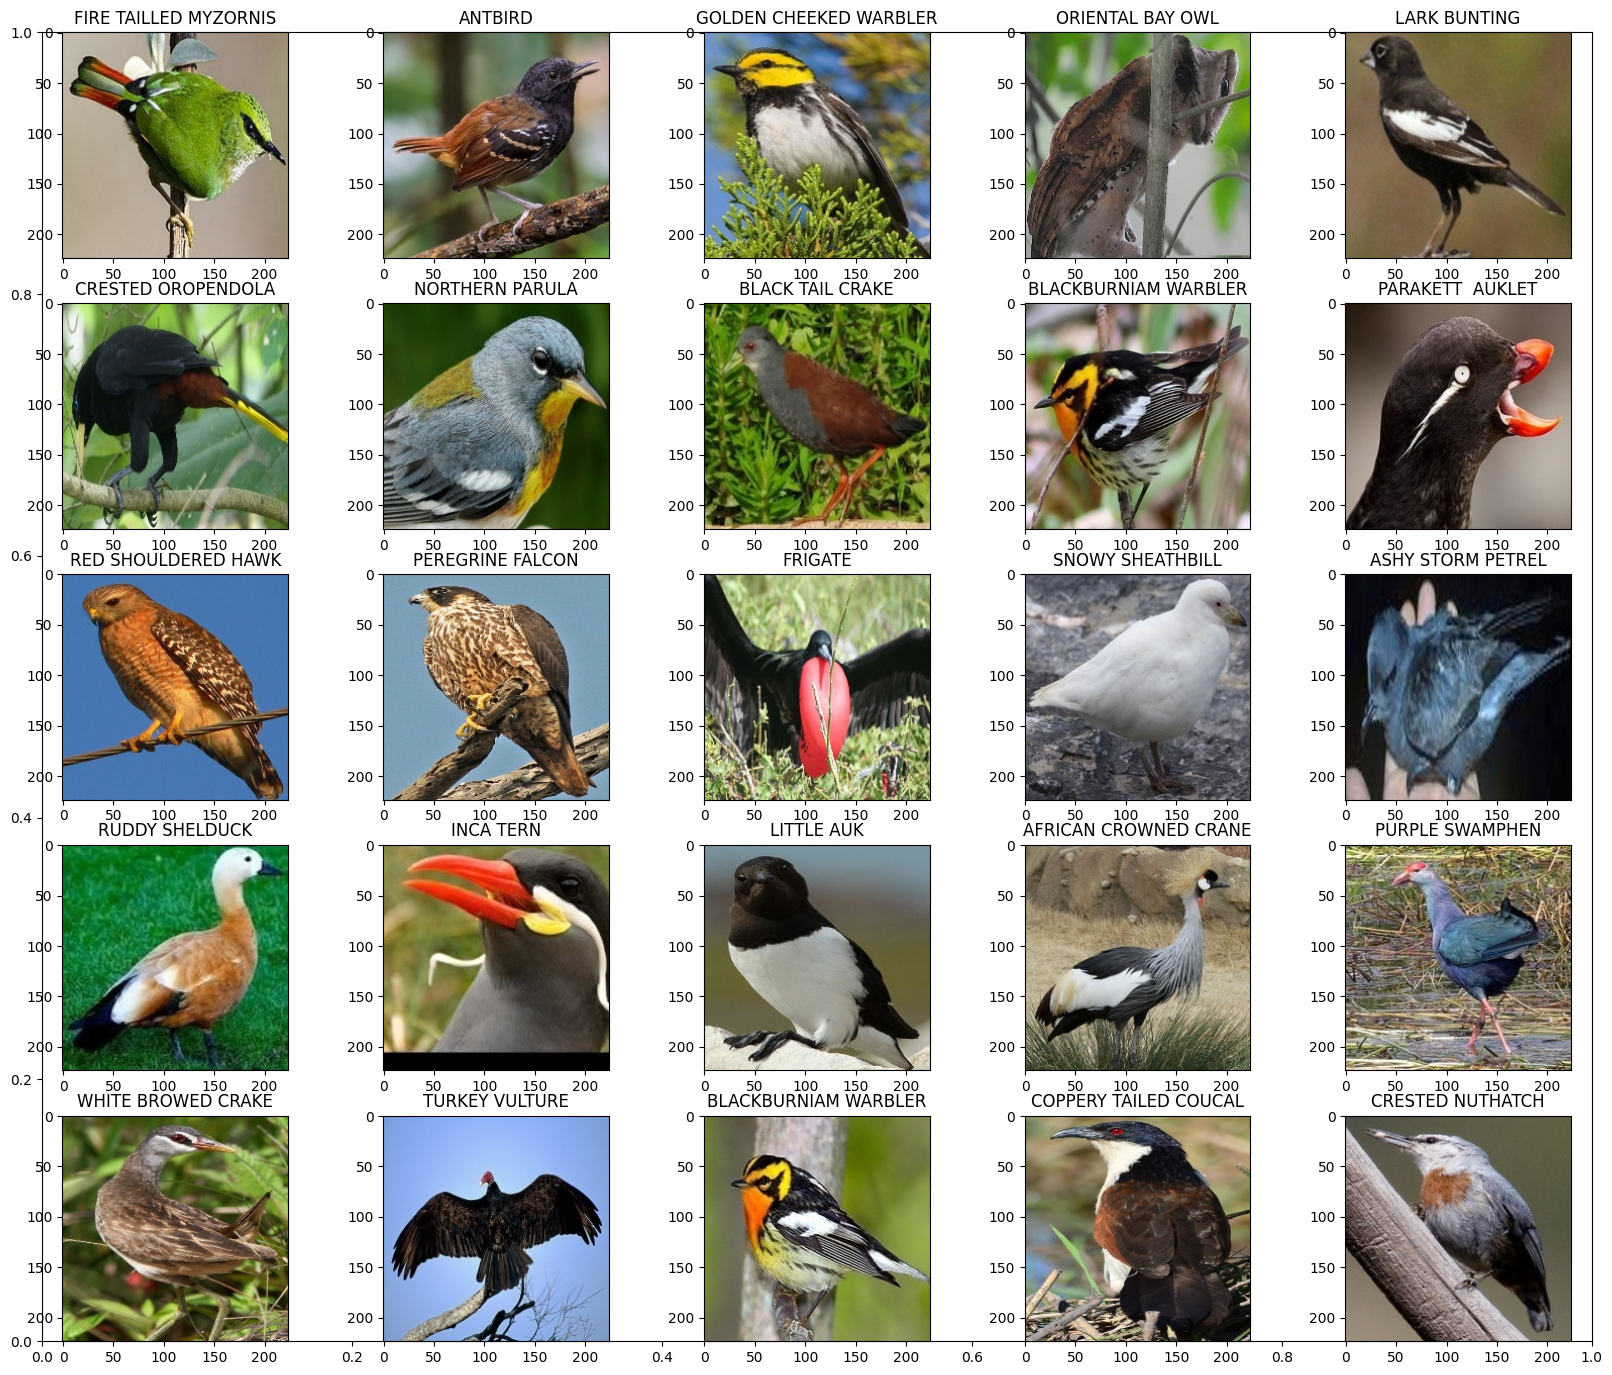

In [5]:
from matplotlib import pyplot as plt
from random import randint

parent_dir = f"{dataset_path}/train/"
all_subdirs = os.listdir(parent_dir)
plt.subplots(figsize=(20, 17))
for col in range(1, 26):
    plt.subplot(5, 5, col)
    chosen_species_dir = all_subdirs[randint(0, 401)]
    chosen_dir = parent_dir + chosen_species_dir
    all_images_in_chosen_dir = os.listdir(chosen_dir)
    chosen_img = (
        chosen_dir
        + "/"
        + all_images_in_chosen_dir[randint(0, len(all_images_in_chosen_dir) - 1)]
    )
    image = imread(chosen_img)
    plt.title(chosen_species_dir)
    plt.imshow(image)

['EUROPEAN GOLDFINCH', 'EUROPEAN TURTLE DOVE', 'EURASIAN MAGPIE', 'EURASIAN BULLFINCH', 'EURASIAN GOLDEN ORIOLE']


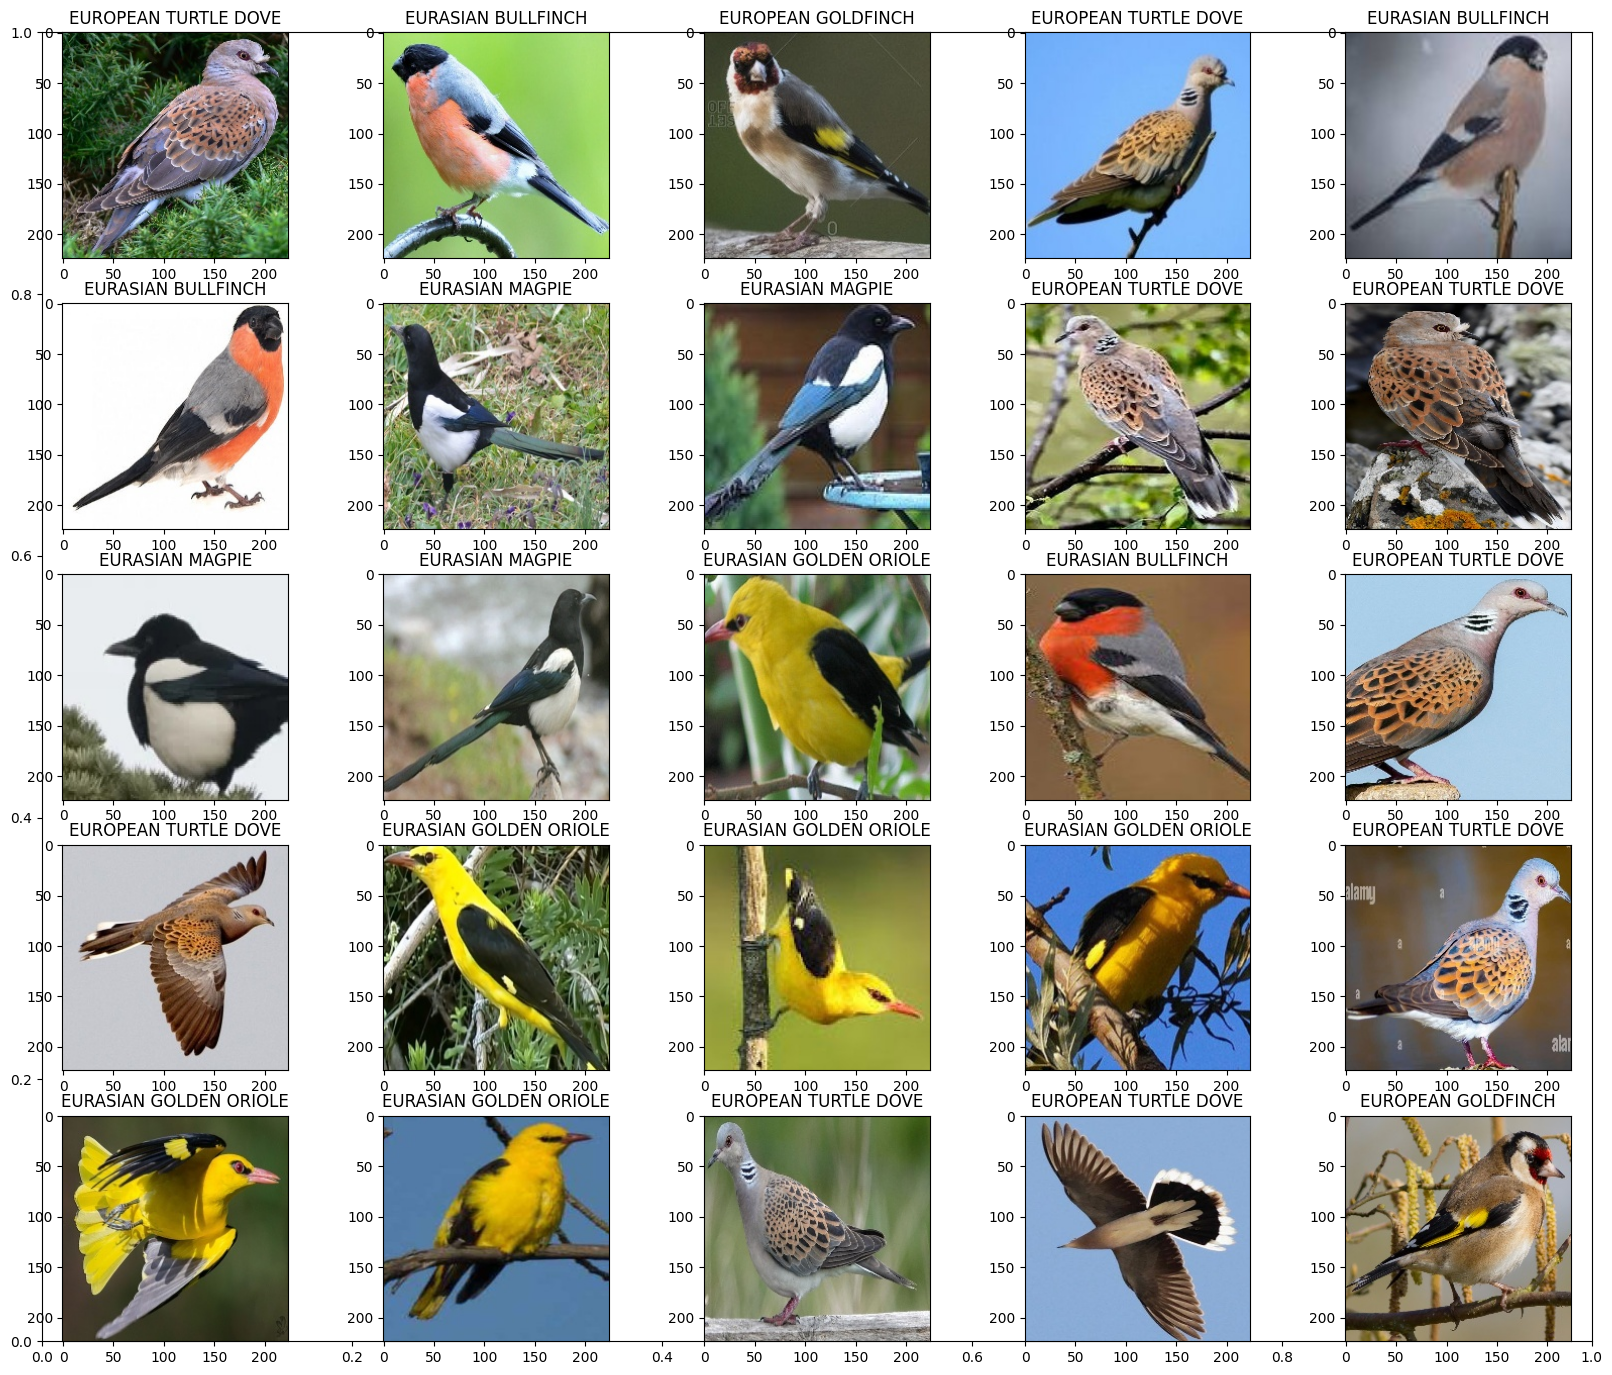

In [6]:
from matplotlib import pyplot as plt
from random import randint

# find those than have EUR in their name
european_birds = [i for i in train_species_names if "EUR" in i]
print(european_birds)

parent_dir = f"{dataset_path}/train/"
all_subdirs = os.listdir(parent_dir)
plt.subplots(figsize=(20, 17))
for col in range(1, 26):
    plt.subplot(5, 5, col)
    chosen_species_dir = european_birds[randint(0, len(european_birds) - 1)]
    chosen_dir = parent_dir + chosen_species_dir
    all_images_in_chosen_dir = os.listdir(chosen_dir)
    chosen_img = (
        chosen_dir
        + "/"
        + all_images_in_chosen_dir[randint(0, len(all_images_in_chosen_dir) - 1)]
    )
    image = imread(chosen_img)
    plt.title(chosen_species_dir)
    plt.imshow(image)

### Model training

In [28]:
from torch.utils.data import Dataset
from torchvision.io import read_image
from torchvision.transforms import (
    Resize,
    Compose,
    ToTensor,
    Normalize,
    ToPILImage,
    CenterCrop,
)
from torch.utils.data import DataLoader

import random
import collections
import os

# Constants
RANDOM_SEED = 42
TRAIN_FRACTION = 0.8
BIRDS_DIR = f"{dataset_path}/train"


def make_train_and_test_sets():
    """Split the data into train and test sets and get the label classes."""
    train_examples, test_examples = [], []
    shuffler = random.Random(RANDOM_SEED)
    is_root = True
    for dirname, subdirs, filenames in os.walk(BIRDS_DIR):
        # The root directory gives us the classes
        if is_root:
            subdirs = sorted(subdirs)
            classes = collections.OrderedDict(enumerate(subdirs))
            label_to_class = dict([(x, i) for i, x in enumerate(subdirs)])
            is_root = False
        # The sub directories give us the image files for training.
        else:
            filenames.sort()
            shuffler.shuffle(filenames)
            full_filenames = [os.path.join(dirname, f) for f in filenames]
            label = dirname.split("/")[-1]
            label_class = label_to_class[label]
            # An example is the image file and it's label class.
            examples = list(zip(full_filenames, [label_class] * len(filenames)))
            num_train = int(len(filenames) * TRAIN_FRACTION)
            train_examples.extend(examples[:num_train])
            test_examples.extend(examples[num_train:])

    shuffler.shuffle(train_examples)
    shuffler.shuffle(test_examples)
    return train_examples, test_examples, classes


# Download the images and split the images into train and test sets.
# download_images()
TRAIN_EXAMPLES, TEST_EXAMPLES, CLASSES = make_train_and_test_sets()
NUM_CLASSES = len(CLASSES)

print("\nThe dataset has %d label classes: %s" % (NUM_CLASSES, CLASSES.values()))
print("There are %d training images" % len(TRAIN_EXAMPLES))
print("there are %d test images" % len(TEST_EXAMPLES))

# Create binary labels based on whether the bird name contains "EUR"
binary_labels_train = [
    1 if any(euro_bird in CLASSES[label] for euro_bird in european_birds) else 0
    for _, label in TRAIN_EXAMPLES
]
binary_labels_test = [
    1 if any(euro_bird in CLASSES[label] for euro_bird in european_birds) else 0
    for _, label in TEST_EXAMPLES
]

# store original name of the bird
original_name_train = [CLASSES[label] for _, label in TRAIN_EXAMPLES]
original_name_test = [CLASSES[label] for _, label in TEST_EXAMPLES]

# Two classes Europe/Eurasia and Rest of the world
class_label_train = [
    (
        "Europe/Eurasia"
        if any(euro_bird in CLASSES[label] for euro_bird in european_birds)
        else "Rest of the world"
    )
    for _, label in TRAIN_EXAMPLES
]
class_label_test = [
    (
        "Europe/Eurasia"
        if any(euro_bird in CLASSES[label] for euro_bird in european_birds)
        else "Rest of the world"
    )
    for _, label in TEST_EXAMPLES
]

class BinaryBirdDataset(Dataset):
    def __init__(self, data, binary_labels, original_name, class_label=None, transform=None):
        self.data = data
        self.binary_labels = binary_labels
        self.original_name = original_name
        self.class_label = class_label
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, _ = self.data[idx]  # Assuming the label is not used here directly
        image = read_image(img_path)
        if self.transform:
            image = self.transform(image)
        binary_label = self.binary_labels[idx]
        original_name = self.original_name[idx]
        class_label = self.class_label[idx] if self.class_label is not None else None
        return image, binary_label, original_name, class_label if class_label is not None else ()

# Define transformations
transformations = Compose(
    [
        Resize(256),
        ToPILImage(),
        CenterCrop(224),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# Create custom dataset
binary_train_dataset = BinaryBirdDataset(
    TRAIN_EXAMPLES,
    binary_labels_train,
    original_name=original_name_train,
    class_label=class_label_train,
    transform=transformations,
)
binary_test_dataset = BinaryBirdDataset(
    TEST_EXAMPLES,
    binary_labels_test,
    original_name=original_name_test,
    class_label=class_label_test,
    transform=transformations,
)

# Create data loaders
binary_train_loader = DataLoader(binary_train_dataset, batch_size=32, shuffle=True)
binary_test_loader = DataLoader(binary_test_dataset, batch_size=32, shuffle=False)


The dataset has 525 label classes: odict_values(['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE

In [26]:
# binary_train_loader.dataset.data[400], binary_train_loader.dataset.binary_labels[400], binary_train_loader.dataset.original_name[400], binary_train_loader.dataset.data[400][1]

### Data Rebalancing

In [79]:
import random
from torch.utils.data import DataLoader

# Set random seed for reproducibility
random.seed(RANDOM_SEED)

def balance_dataset(examples, binary_labels, original_names, class_labels):
    # Calculate the number of positive and negative examples
    num_positive = sum(binary_labels)
    num_negative = len(binary_labels) - num_positive

    # Find the indices of positive and negative examples
    positive_indices = [i for i, label in enumerate(binary_labels) if label == 1]
    negative_indices = [i for i, label in enumerate(binary_labels) if label == 0]

    # Randomly sample the same number of negative examples as positive examples
    random_negative_indices = random.sample(negative_indices, num_positive)

    # Combine the positive and sampled negative indices
    balanced_indices = positive_indices + random_negative_indices

    # Create balanced training examples and labels
    balanced_examples = [examples[i] for i in balanced_indices]
    balanced_labels = [binary_labels[i] for i in balanced_indices]
    balanced_original_names = [original_names[i] for i in balanced_indices]
    balanced_class_labels = [class_labels[i] for i in balanced_indices]

    # Print the number of positive and negative examples after balancing
    print(f"Number of positive examples: {num_positive}")
    print(f"Number of negative examples before balancing: {num_negative}")
    print(f"Number of negative examples after balancing: {len(balanced_labels) - num_positive}")

    return balanced_examples, balanced_labels, balanced_original_names, balanced_class_labels

# Balance training dataset
balanced_train_examples, balanced_binary_labels_train, balanced_original_name_train, balanced_class_label_train = balance_dataset(
    TRAIN_EXAMPLES, binary_labels_train, original_name_train, class_label_train)

# Create custom dataset for training
balanced_binary_train_dataset = BinaryBirdDataset(
    balanced_train_examples,
    balanced_binary_labels_train,
    original_name=balanced_original_name_train,
    class_label=balanced_class_label_train,
    transform=transformations
)

# Create data loader for training
balanced_binary_train_loader = DataLoader(
    balanced_binary_train_dataset, batch_size=50, shuffle=True
)

# Balance validation dataset
balanced_val_examples, balanced_binary_labels_val, balanced_original_name_val, balanced_class_label_val = balance_dataset(
    TEST_EXAMPLES, binary_labels_test, original_name_test, class_label_test)

# Create custom validation dataset
balanced_binary_val_dataset = BinaryBirdDataset(
    balanced_val_examples,
    balanced_binary_labels_val,
    original_name=balanced_original_name_val,
    class_label=balanced_class_label_val,
    transform=transformations
)

# Create validation data loader
balanced_binary_val_loader = DataLoader(
    balanced_binary_val_dataset, batch_size=50, shuffle=True
)

Number of positive examples: 577
Number of negative examples before balancing: 66942
Number of negative examples after balancing: 577
Number of positive examples: 146
Number of negative examples before balancing: 16970
Number of negative examples after balancing: 146


In [81]:
import numpy as np
# Calculate the count of each label
label_counts = np.bincount(balanced_binary_labels_train)

# Print the label counts
for label_index, count in enumerate(label_counts):
    print(f"Label {label_index}: {count} samples")

Label 0: 577 samples
Label 1: 577 samples


### ResNet

In [84]:
import torch.optim as optim
from torchvision import models
import torch.nn as nn
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set random seed
torch.manual_seed(0)

# Load pretrained ResNet18 model
model = models.resnet18(weights='IMAGENET1K_V1')

# Freeze all layers in the ResNet model
for param in model.parameters():
    param.requires_grad = False

# Replace the last fully connected layer with a new one
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)

# Move the model to the device
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for inputs, labels, _, _ in balanced_binary_train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(balanced_binary_train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/10, Loss: 0.5582
Epoch 2/10, Loss: 0.5585
Epoch 3/10, Loss: 0.4286
Epoch 4/10, Loss: 0.2700
Epoch 5/10, Loss: 0.3862
Epoch 6/10, Loss: 0.3438
Epoch 7/10, Loss: 0.2403
Epoch 8/10, Loss: 0.2074
Epoch 9/10, Loss: 0.2069
Epoch 10/10, Loss: 0.1999


In [88]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    with torch.no_grad():  # Disable gradient tracking
        for inputs, labels, _, _ in dataloader:
                        
            inputs, labels = inputs.to(device), labels.to(device)
            # inputs = inputs.view(inputs.size(0), -1)  # Flatten the images
            outputs = model(inputs)
                        
            # Compute the loss
            loss = criterion(outputs.squeeze(), labels.float())
                        
            total_loss += loss.item() * inputs.size(0)
            
            # Calculate the number of correct predictions
            predicted_labels = (torch.sigmoid(outputs) > 0.5).float()
                        
            correct_predictions += (predicted_labels == labels.unsqueeze(1).float()).sum().item()
            total_samples += labels.size(0)
    
    # Calculate average loss and accuracy
    average_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples
        
    return average_loss, accuracy


test_loss, test_accuracy = evaluate_model(model, balanced_binary_val_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.0%}')

Test Loss: 0.1891, Test Accuracy: 93%


### Serialize and load the model

In [16]:
# PATH = f'{dataset_path}/model_resnet_18_birds.pth'

# torch.save(model.state_dict(), PATH)

In [86]:
import torch
import torchvision.models as models

PATH = f'{dataset_path}/model_resnet_18_birds.pth'

# Define the same model architecture as was used during training
model = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)

# Load the saved state dictionary into this model architecture
model.load_state_dict(torch.load(PATH))

# Ensure to call model.to(device) if you are using GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

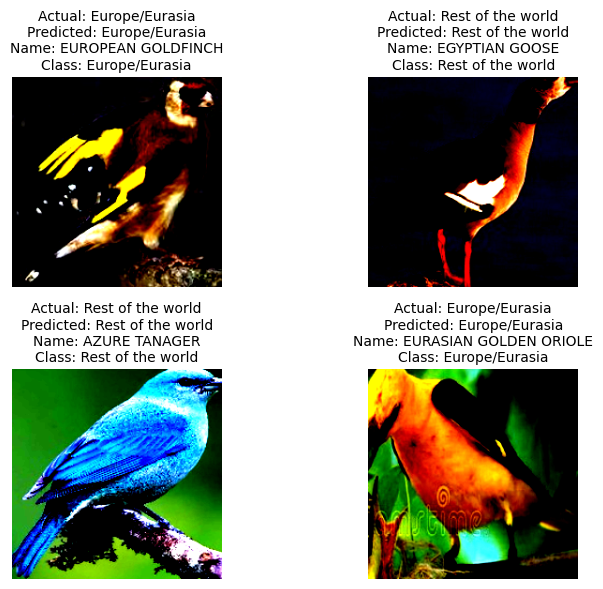

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def visualize_model(model, dataloader, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    rows = num_images // 2 + num_images % 2
    plt.figure(figsize=(8, rows * 3))

    with torch.no_grad():
        for inputs, labels, names, class_labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            preds = (torch.sigmoid(outputs) > 0.5).int() # Thresholding

            for j in range(inputs.size(0)):
                if images_so_far == num_images:
                    break
                images_so_far += 1
                plt.subplot(rows, 2, images_so_far)
                plt.axis('off')
                actual_label = labels[j].cpu().item()
                predicted_label = preds[j].cpu().item()
                plt.title(
                    f"Actual: {'Europe/Eurasia' if actual_label == 1 else 'Rest of the world'}\n"
                    f"Predicted: {'Europe/Eurasia' if predicted_label == 1 else 'Rest of the world'}\n"
                    f"Name: {names[j]}\n"
                    f"Class: {class_labels[j]}",
                    fontsize=10
                )
                image = inputs.cpu().data[j].permute(1, 2, 0).numpy()
                image = np.clip(image, 0, 1)
                plt.imshow(image)

        plt.tight_layout()
        plt.show()

    model.train(mode=was_training)

# Usage of the function
visualize_model(model, balanced_binary_val_loader, num_images=4)

### Integrated Gradients

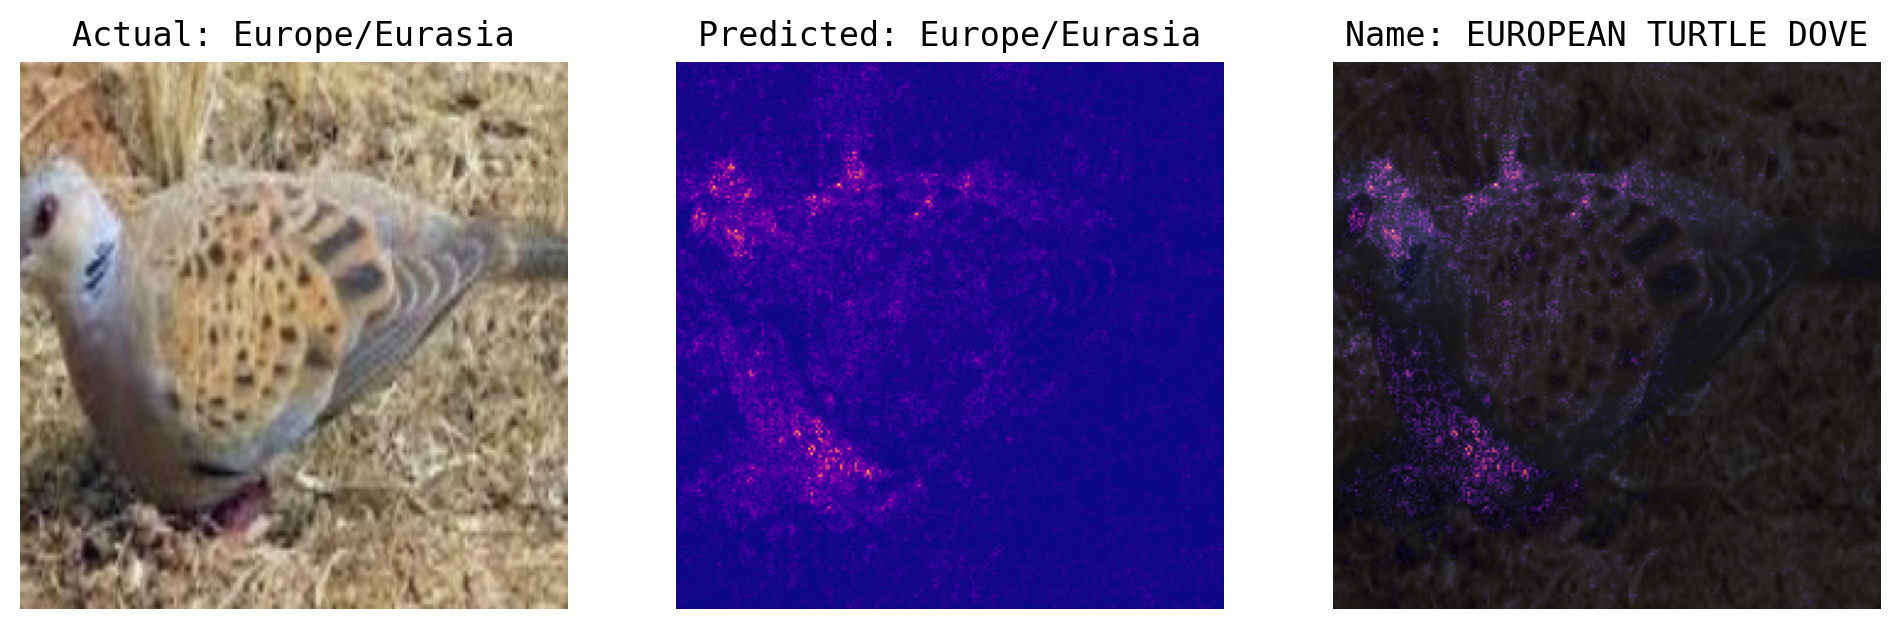

In [170]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

%config InlineBackend.figure_format = 'retina'

# Set font to monospace
plt.rcParams['font.family'] = 'monospace'

def visualize_attributions(model, dataloader, device):
    model.eval()
    integrated_gradients = IntegratedGradients(model)

    # Get a single batch from the dataloader and select one image randomly
    inputs, labels, names, class_labels = next(iter(dataloader))

    random_idx = random.randint(0, inputs.size(0) - 1)
    
    # Use the random index to select the corresponding single image, label, name, and class label
    inputs = inputs[random_idx].unsqueeze(0).to(device)
    labels = labels[random_idx].unsqueeze(0).to(device)
    
    # reshape labels to match the model output
    if labels == 1:
        # make sure we don't run out of bounds
        labels = torch.tensor([0]).to(device)

    name = names[random_idx]  # Adjusted to fetch the correct name
    class_label = class_labels[random_idx]  # Adjusted to fetch the correct class label

    # Assuming model outputs one value per instance (binary classification with sigmoid)
    attributions = integrated_gradients.attribute(inputs, target=labels, n_steps=50)

    # Normalize attributions for visualization
    attributions = attributions.view(inputs.size()).detach()
    attribution_np = np.mean(np.abs(attributions.cpu().numpy()), axis=1)[0]
    
    # Normalize image for display
    image_np = inputs[0].cpu().data.numpy().transpose((1, 2, 0))
    image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())

    # Model prediction
    outputs = model(inputs)
    predicted_labels = (torch.sigmoid(outputs) > 0.5).int().item()

    # Visualization
    _ = plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f"Actual: {class_label}")

    plt.subplot(1, 3, 2)
    plt.imshow(attribution_np, cmap='plasma')
    plt.axis('off')
    plt.title("Attributions")
    plt.title(f'Predicted: {"Europe/Eurasia" if predicted_labels == 1 else "Rest of the world"}')

    plt.subplot(1, 3, 3)
    plt.imshow(image_np)
    plt.imshow(attribution_np, cmap='magma', alpha=0.8)
    plt.axis('off')
    plt.title(f'Name: {name}')

    plt.show()

# Ensure model and device are defined
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
visualize_attributions(model, balanced_binary_val_loader, device)